**载入数据**

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import seaborn as sns

io = r'G:\课件\人工智能\作业\人工智能作业\CCPP\Folds5x2_pp.xlsx'   #使用pandas读取数据
data = pd.read_excel(io, sheet_name = 0)

print("数据信息： ", data.shape)                         #打印数据的维度，第一个参数表示数据的个数，第二个表示每个数据的特征数
data.head()                               #可以读取前5行数据

数据信息：  (9568, 5)


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


**准备数据**

In [48]:
X = data[['AT', 'V', 'AP', 'RH']]         #可以提取数据集的AT, V, AP, RH这 四个特征
Y = data[['PE']]                          #可以提取数据集的PE这个特征
X.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


**划分训练集和测试集**

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)        #用sklearn的estimators  train_test_split划分训练集与测试集
print("训练集信息： ", X_train.shape, Y_train.shape)
print("测试集信息： ", X_test.shape, Y_test.shape)

训练集信息：  (7176, 4) (7176, 1)
测试集信息：  (2392, 4) (2392, 1)


**运行线性模型**

In [50]:
linreg = LinearRegression()                                                     #用sklearn的线性回归算法来拟合训练集
linreg.fit(X_train, Y_train)
print("训练集拟合的截距与系数: ", linreg.intercept_, linreg.coef_)

训练集拟合的截距与系数:  [460.05727267] [[-1.96865472 -0.2392946   0.0568509  -0.15861467]]


**模型分析评价**

In [51]:
Y_pred = linreg.predict(X_test)
print( "MSE:", metrics.mean_squared_error(Y_test, Y_pred))
print( "RMSE:", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MSE: 20.837191547220353
RMSE: 4.564777272465805


**画图观察结果**

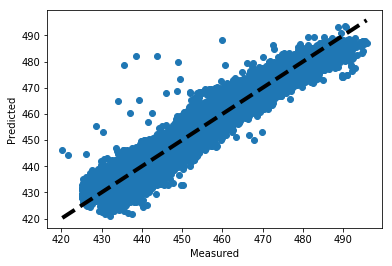

In [52]:
Y_pred = linreg.predict(X)
fig, ax = plt.subplots()
ax.scatter(Y, Y_pred)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

**使用seaborn画图**

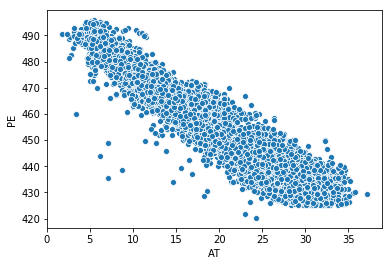

In [54]:
sns.scatterplot(x = data['AT'], y = data['PE'])                          #通过绘图发现AT与PE呈负相关   